## Кластерный анализ методом k-means

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('/Users/d.kapanadze/Downloads/Учеба/ИТМО/1 семестр/Анализ данных на Python/Задачи на первую лабу/экономика городов/Econom_Cities_data.csv', sep=';')

# Преобразуем числовые переменные в тип float
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)

# Сразу выкинем выбросы
df = df.query("Work > 0").reset_index(drop=True)


df.head()

,City,Work,Price,Salary
0,Amsterdam,1714,65.6,49.0
1,Athens,1792,53.8,30.4
2,Bogota,2152,37.9,11.5
3,Bombay,2052,30.3,5.3
4,Brussels,1708,73.8,50.5


In [65]:
# Опять же надо выкинуть категориальную переменную City 
df_num = df.drop('City', axis=1)

# Стандартизируем данные
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Сделаем тестовую кластеризацию с параметрами по дефолту
kmeans = KMeans(random_state=42, verbose=1).fit(df_num)

Initialization complete
Iteration 0, inertia 24.652886822066698.
Iteration 1, inertia 20.7693219981973.
Iteration 2, inertia 19.62152087570483.
Iteration 3, inertia 19.459196674582458.
Iteration 4, inertia 19.325280686072638.
Converged at iteration 4: strict convergence.


In [55]:
kmeans.n_clusters

8

Получили 8 кластеров, что скорее всего слишком много для такого маленького набора данных. На самом деле это дефолтное значение для KMeans. Придётся подбирать параметры.

#### Посмотрим на данные

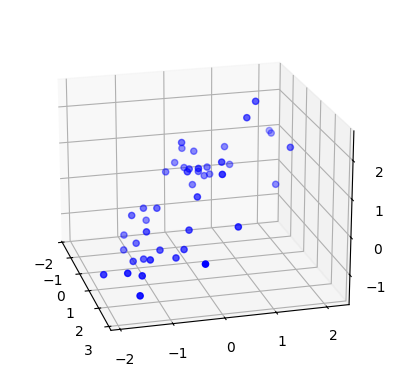

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_num.Work, df_num.Price, df_num.Salary, c='b', marker='o')

# Задаём угол просмотра графика
ax.view_init(elev=20., azim=-15, roll=0)

plt.show()

In [64]:
kmeans2 = KMeans(n_clusters=3, verbose=1, random_state=42).fit(df_num)

Initialization complete
Iteration 0, inertia 67.5808573166704.
Iteration 1, inertia 56.901699124574755.
Iteration 2, inertia 52.77724039700358.
Iteration 3, inertia 50.64967566334312.
Converged at iteration 3: strict convergence.


In [58]:
df2 = df.copy(deep=True)
df2['cluster'] = kmeans2.labels_

In [59]:
df2.query("cluster==1")

,City,Work,Price,Salary,cluster
7,Chicago,1924,73.9,61.9,1
12,Geneva,1880,95.9,90.3,1
15,Houston,1978,71.9,46.3,1
21,Los_Angeles,2068,79.8,65.2,1
29,New_York,1942,83.3,65.8,1
40,Taipei,2145,84.3,34.5,1
42,Tokyo,1880,115.0,68.0,1
43,Toronto,1888,70.2,58.2,1
45,Zurich,1868,100.0,100.0,1


In [60]:
df2.query("cluster==2")

,City,Work,Price,Salary,cluster
0,Amsterdam,1714,65.6,49.0,2
4,Brussels,1708,73.8,50.5,2
8,Copenhagen,1717,91.3,62.9,2
9,Dublin,1759,76.0,41.4,2
10,Dusseldorf,1693,78.5,60.2,2
11,Frankfurt,1650,74.5,60.4,2
13,Helsinki,1667,113.6,66.6,2
20,London,1737,84.2,46.2,2
22,Luxembourg,1768,71.1,71.1,2
23,Madrid,1710,93.8,50.0,2


In [61]:
df2.query("cluster==0")

,City,Work,Price,Salary,cluster
1,Athens,1792,53.8,30.4,0
2,Bogota,2152,37.9,11.5,0
3,Bombay,2052,30.3,5.3,0
5,Buenos_Aires,1971,56.1,12.5,0
6,Caracas,2041,61.0,10.9,0
14,Hong_Kong,2375,63.8,27.8,0
16,Johannesburg,1945,51.1,24.0,0
17,Kuala_Lumpur,2167,43.5,9.9,0
18,Lagos,1786,45.2,2.7,0
19,Lisbon,1742,56.2,18.8,0


In [62]:
df2.drop('City', axis=1).groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,1980.000000,50.800000,15.440000
1,1952.555556,86.033333,65.577778
2,1723.705882,84.370588,54.123529


Полученные кластеры легко описать:
1. Среднее кол-во рабочих часов, высокие цены, высокие зарплаты
2. Кол-во рабочих часов не больше 1800, при этом также высокие цены и зарплаты
0. Большое кол-во рабочих часов, средние цены и низкие зарплаты